# Prepare Vertices data for Ellipses

## Data
All data is in the **data** directory with 1 directory per user. 
### Directory Structure
For each sample, there is:
- An image like: images/ellipse/ellipse.aly.0001.png
- A file with the vertices coordinates, like: vertices/ellipse/ellipse.aly.0001.csv  

Where:
- The vertices file has 1 line per vertex

#### Vertex
Each Vertex has:
- a x coordinate betwwen 0 and 1
- a y coordinate betwwen 0 and 1  

Where
- (0,0) is the top left corner of the image
- (1,1) is the bottom right corner of the image

**Note about the Ellipse Vertices**    
Vertices and Covertices of the ellipse are all called vertices here.

### Separate Train, Validation and Test sets
Each user will have all their images in 1 of the 3 sets. 


---
## ETL - Processing
For each of the Train, Validation and Test set:
- Load the image files
  - 70px x 70px gray (black on white) png files
- Normalize image:
  - All gray pixel are represented as a value between 0 and 1.
  - Black on white images are transforme to white on black.
- Prepare the labels based on the data in user/vertices csv files   
- Load **Train**, **Validation** and **Test** data into pickles for Estimation

In [1]:
import imageio
import numpy as np
import os
from pathlib import Path
from six.moves import cPickle as pickle

from mix_module.shape_utils import get_dir_paths, is_correct_shape_to_process, load_images_for_shape, save_to_pickle

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
%matplotlib inline

seed1 = 125
np.random.seed(seed1)

verbose=False  # Set to True to get more output

In [2]:
from platform import python_version
print(python_version())

3.8.3


In [3]:
BASEDIR = ".."

DATA_DIR        = os.path.join(BASEDIR, "..", "..", "data")

PICKLE_DIR     = os.path.join(BASEDIR, "pickles")
TRAIN_DATAFILE = os.path.join(PICKLE_DIR, 'train_ell.pickle')
VAL_DATAFILE   = os.path.join(PICKLE_DIR, 'val_ell.pickle')
TEST_DATAFILE  = os.path.join(PICKLE_DIR, 'test_ell.pickle')

In [4]:
# Define the Users for the Validation set and the Test set
# The Rest will go in the Training set
#
# The following definitions are arbitrary, but this is balanced and works well.
validation_users = ['drt', 'il1', 'lt1', 'lts', 'u01', 'u04', 'u04', 'u05', 'u08', 'u09', 'u10', 'u12', 'u17']
test_users = ['u18', 'u19']

In [5]:
# Get directory and file paths of Shape data with vertices
data_paths = get_dir_paths(DATA_DIR)

In [6]:
# Set image properties
image_size  = 70     # Pixel width and height
pixel_depth = 255.0  # Number of levels per pixel

In [7]:
# Create Pickle directory
Path(PICKLE_DIR).mkdir(parents=True, exist_ok=True)

In [8]:
# Load all images and vertices for a specific user
def load_images_for_user(user_root, pixel_depth, user_images, user_images_labels, user_images_paths, verbose=False):
    images_dir = os.path.join(user_root, "images")

    if verbose:
        print("root for load_images_for_user: ", images_dir)

    shape_dirs = get_dir_paths(images_dir)
    for dir in shape_dirs:
        if is_correct_shape_to_process(dir, "ellipse"):
            load_images_for_shape(dir, pixel_depth, user_images, user_images_labels, user_images_paths, \
                                  vertice_count=4, x_pos=0.0, y_pos=0.65, verbose=verbose)

In [9]:
def plot_sample(X, y, axs):
    axs.imshow(X.reshape(image_size, image_size), cmap="gray") # Put the Image
    y = y.ravel()
    axs.scatter(image_size * y[0::2], image_size * y[1::2], c='orange') # Add the labels as orange dots

In [10]:
# This function shows images with their real vertices
# Presentation is 5 rows of 10 images
def display_50_images_with_vertices(X, Y):

    fig = plt.figure(figsize=(13, 9))
    fig.subplots_adjust(hspace=0.2,wspace=0.2,
                        left=0, right=1, bottom=0, top=1.5)

    nb_pictures = 50
    for i_pic in range(nb_pictures):
        x = X[i_pic]
        y = Y[i_pic]

        ax  = fig.add_subplot(nb_pictures//5, 10, i_pic + 1, xticks=[], yticks=[])
        plot_sample(x, y, ax)
    plt.show()

In [11]:
# Training data
train_user_images = []
train_user_images_labels = []
train_user_images_paths = {}

for user_dir in data_paths:
    user_id = user_dir[-3:]  # User unique id is the last 3 letters
    if user_id not in validation_users and user_id not in test_users:
        load_images_for_user(user_dir, pixel_depth, train_user_images, train_user_images_labels, \
                             train_user_images_paths, verbose=verbose)

train_data   = np.array(train_user_images)
train_labels = np.array(train_user_images_labels)

print('train_data shape: ', train_data.shape)
print('train_labels shape: ', train_labels.shape)

if verbose:
    # Show distribution of the x,y for all vertices vertices
    unique, counts = np.unique(train_labels, return_counts=True)
    print("train label dist.: ", dict(zip(unique, counts)))

# Save TRAIN datasets to single pickle file
save_to_pickle(
    TRAIN_DATAFILE,
    {
        'train_data': train_data,
        'train_labels': train_labels
    }
)

train_data shape:  (4828, 70, 70)
train_labels shape:  (4828, 8)


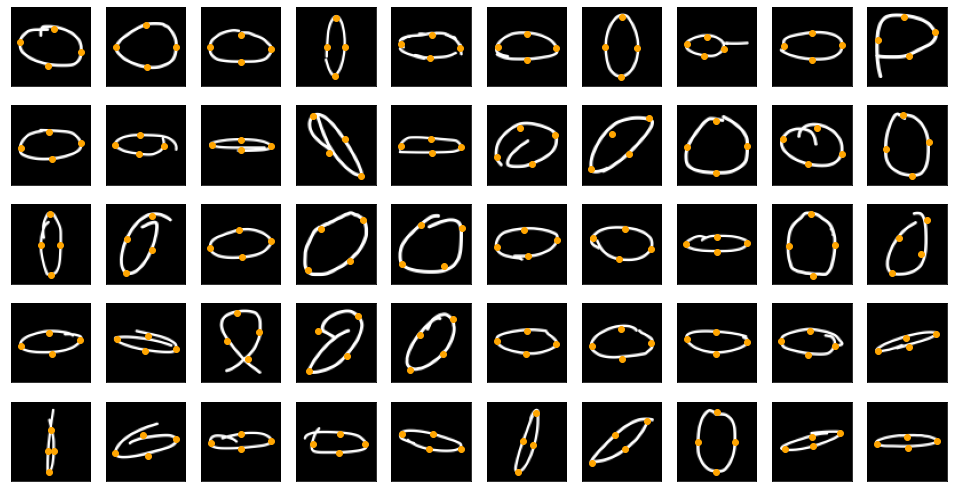

In [12]:
# Show random images from the Train Set
indexes = np.arange(len(train_labels))
np.random.shuffle(indexes)
first_random_indexes = indexes[:50]

display_50_images_with_vertices(train_data[first_random_indexes],train_labels[first_random_indexes])

In [13]:
del train_data
del train_labels

In [14]:
# Validation data
val_user_images = []
val_user_images_label = []

for user_dir in data_paths:
    user_id = user_dir[-3:]  # User unique id is the last 3 letters
    if user_id in validation_users:
        load_images_for_user(user_dir, pixel_depth, val_user_images, val_user_images_label, \
                             train_user_images_paths, verbose=verbose)

val_data = np.array(val_user_images)
val_labels = np.array(val_user_images_label)

print('val_data shape: ', val_data.shape)
print('val_labels shape: ', val_labels.shape)

if verbose:
    # Show distribution of the x,y for all vertices vertices
    unique, counts = np.unique(val_labels, return_counts=True)
    print("val label dist.: ", dict(zip(unique, counts)))

# Save VALIDATION datasets to single pickle file
save_to_pickle(
    VAL_DATAFILE,
    {
        'val_data': val_data,
        'val_labels': val_labels
    }
)

val_data shape:  (1446, 70, 70)
val_labels shape:  (1446, 8)


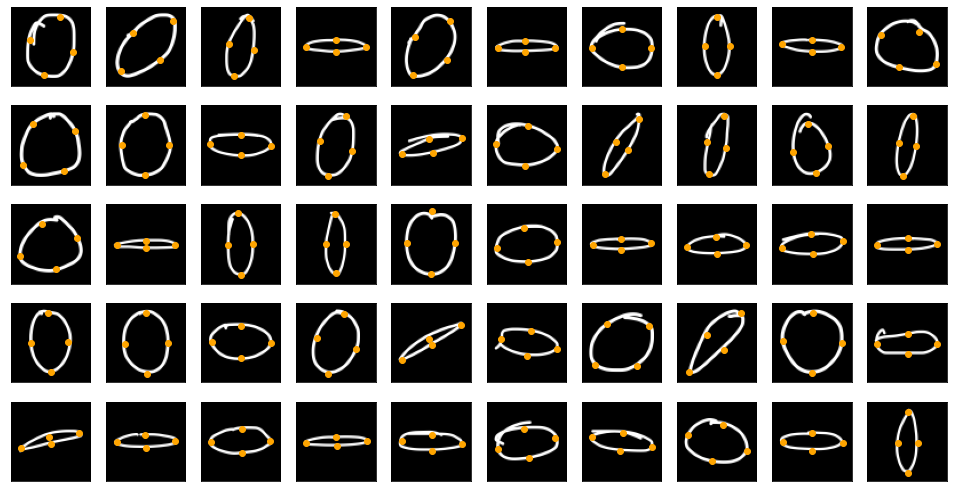

In [15]:
# Show random images from the Validation Set
indexes = np.arange(len(val_labels))
np.random.shuffle(indexes)
first_random_indexes = indexes[:50]

display_50_images_with_vertices(val_data[first_random_indexes],val_labels[first_random_indexes])

In [16]:
del val_data
del val_labels

In [17]:
# Test data
test_user_images = []
test_user_images_label = []

for user_dir in data_paths:
    user_id = user_dir[-3:]  # User unique id is the last 3 letters
    if user_id in test_users:
        load_images_for_user(user_dir, pixel_depth, test_user_images, test_user_images_label, \
                             train_user_images_paths, verbose=verbose)

test_data   = np.array(test_user_images)
test_labels = np.array(test_user_images_label)

print('test_data shape: ', test_data.shape)
print('test_labels shape: ', test_labels.shape)

if verbose:
    # Show distribution of the x,y for all vertices vertices
    unique, counts = np.unique(test_labels, return_counts=True)
    print("test label dist.: ", dict(zip(unique, counts)))

# Save TEST datasets to single pickle file
save_to_pickle(
    TEST_DATAFILE,
    {
        'test_data': test_data,
        'test_labels': test_labels
    }
)

test_data shape:  (180, 70, 70)
test_labels shape:  (180, 8)


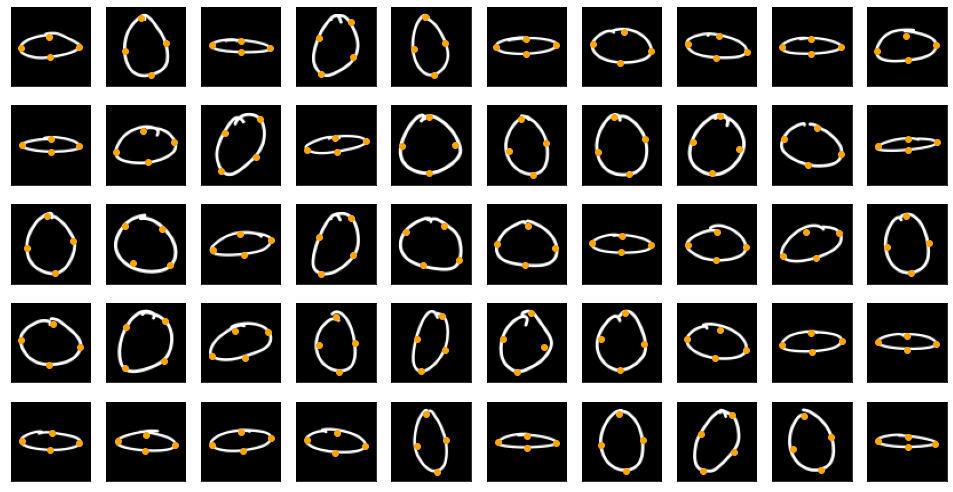

In [18]:
# Show random images from the Test Set
indexes = np.arange(len(test_labels))
np.random.shuffle(indexes)
first_random_indexes = indexes[:50]

display_50_images_with_vertices(test_data[first_random_indexes], test_labels[first_random_indexes])

## ETL Completed